In [1]:
import numpy as np
import defs
import appynho

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_25 = defs.read_well('../data/7-MP-25-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_34 = defs.read_well('../data/7-MP-34D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_36 = defs.read_well('../data/7-MP-36D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_47 = defs.read_well('../data/7-MP-47DP-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])

In [4]:
well_25['LITHOLOGY'] = well_25['Lith_new']
well_34['LITHOLOGY'] = well_34['Lith_new']
well_36['LITHOLOGY'] = well_36['Lith_new']
well_47['LITHOLOGY'] = well_47['Lith_new']

In [5]:
#setting top and base of the Maracangalha formation
top = 2500.00
base = 3100.00
step = 3.0
overlap = 0.00

In [6]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_25 = defs.formation_zone(well_25, top, base)
formation_34 = defs.formation_zone(well_34, top, base)
formation_36 = defs.formation_zone(well_36, top, base)
formation_47 = defs.formation_zone(well_47, top, base)

In [7]:
#creating curves that only contains one lithology type, for each lithology
#using the function "separate_lithology" in the file "defs"
separate_25 = defs.separate_lithology(formation_25, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_34 = defs.separate_lithology(formation_34, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_36 = defs.separate_lithology(formation_36, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_47 = defs.separate_lithology(formation_47, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])

In [8]:
statistic_25 = defs.statistic_lithology(separate_25, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_34 = defs.statistic_lithology(separate_34, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_36 = defs.statistic_lithology(separate_36, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_47 = defs.statistic_lithology(separate_47, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)

C:\Users\rmota\Documents\PFG_2020\codes\defs.py:393: RuntimeWarning: Mean of empty slice
  m = np.nanmean(curve_save[w])
c:\users\rmota\.conda\envs\tcc3\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [9]:
def create_database(statistics, lithology, curve):
    means = []
    stds = []
    for well in statistics:
        means.append(np.array(well[lithology][curve]['Mean']['Value']))
        stds.append(np.array(well[lithology][curve]['Std']['Value']))
        
    m = means[0]
    s = stds[0]
    for mean, std in zip(means[1:], stds[1:]):
        nans = np.array(list(map(np.isnan, m)))
        m[nans] = mean[nans]
        s[nans] = std[nans]
    
    return [list(m), list(s)]

In [10]:
tops = statistic_25['SANDSTONE']['GR']['Mean']['Top']
bases = statistic_25['SANDSTONE']['GR']['Mean']['Base']

In [11]:
lithology = ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE']
curves = ['GR', 'NPHI', 'RHOB', 'DT']
database = {}
for lith in lithology:
    database[lith] = {}
    for curve in curves:
        database[lith][curve] = {}
        database[lith][curve]['Mean'] = {}
        database[lith][curve]['Std'] = {}
        database[lith][curve]['Mean']['Top'] = tops
        database[lith][curve]['Mean']['Base'] = bases
        database[lith][curve]['Mean']['Value'] = create_database([statistic_25, statistic_34, statistic_36, statistic_47], lith, curve)[0]
        database[lith][curve]['Std']['Top'] = top
        database[lith][curve]['Std']['Base'] = base
        database[lith][curve]['Std']['Value'] = create_database([statistic_25, statistic_34, statistic_36, statistic_47], lith, curve)[1]

In [12]:
database

{'SANDSTONE': {'GR': {'Mean': {'Top': [2500.0,
     2503.0,
     2506.0,
     2509.0,
     2512.0,
     2515.0,
     2518.0,
     2521.0,
     2524.0,
     2527.0,
     2530.0,
     2533.0,
     2536.0,
     2539.0,
     2542.0,
     2545.0,
     2548.0,
     2551.0,
     2554.0,
     2557.0,
     2560.0,
     2563.0,
     2566.0,
     2569.0,
     2572.0,
     2575.0,
     2578.0,
     2581.0,
     2584.0,
     2587.0,
     2590.0,
     2593.0,
     2596.0,
     2599.0,
     2602.0,
     2605.0,
     2608.0,
     2611.0,
     2614.0,
     2617.0,
     2620.0,
     2623.0,
     2626.0,
     2629.0,
     2632.0,
     2635.0,
     2638.0,
     2641.0,
     2644.0,
     2647.0,
     2650.0,
     2653.0,
     2656.0,
     2659.0,
     2662.0,
     2665.0,
     2668.0,
     2671.0,
     2674.0,
     2677.0,
     2680.0,
     2683.0,
     2686.0,
     2689.0,
     2692.0,
     2695.0,
     2698.0,
     2701.0,
     2704.0,
     2707.0,
     2710.0,
     2713.0,
     2716.0,
     2719.0,
    

In [13]:
well_55 = defs.read_well('../data/7-MP-55D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'Lith_new'])
well_55['LITHOLOGY'] = well_55['Lith_new']
formation_55 = defs.formation_zone(well_55, top, base)
separate_55 = defs.separate_lithology(formation_55, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])

In [14]:
gr_sort_55 = defs.sort_curve(separate_55, database, litho_types, 'GR', step, top, base)

### Arrumar os limites dos eixos
### Colocar perfil de litologia
### Criar sorteio do RHOB
### Adicionar o gráfico de correlação
### Determinar intervalos da janela (3m e 100m - verificar com o gráfico de correlação)

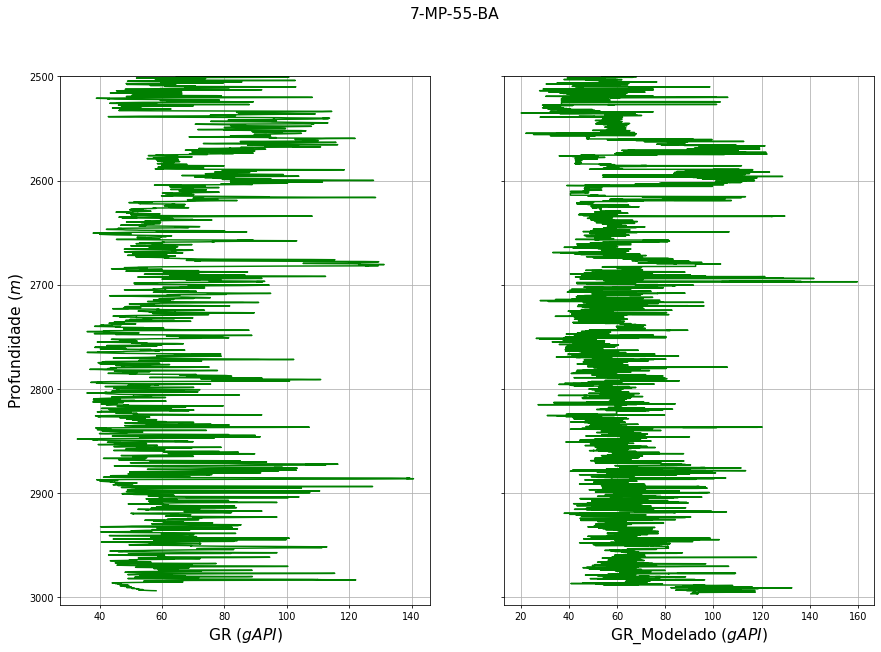

In [30]:
#Arrumar os limites dos eixos
#colocar perfil de litologia
grafico = appynho.plotagem(2, titulo = '7-MP-55-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_55['GR'], separate_55['DEPTH'], cor = 'g', descricao_x = 'GR $(gAPI)$', descricao_y = 'Profundidade $(m)$', titulo='')
grafico.plot_s(1, gr_sort_55, separate_55['DEPTH'], cor = 'g', descricao_x = 'GR_Modelado $(gAPI)$', descricao_y = 'Profundidade $(m)$', titulo='')

In [16]:
nphi_sort_55 = defs.sort_curve(separate_55, database, litho_types, 'NPHI', step, top, base)

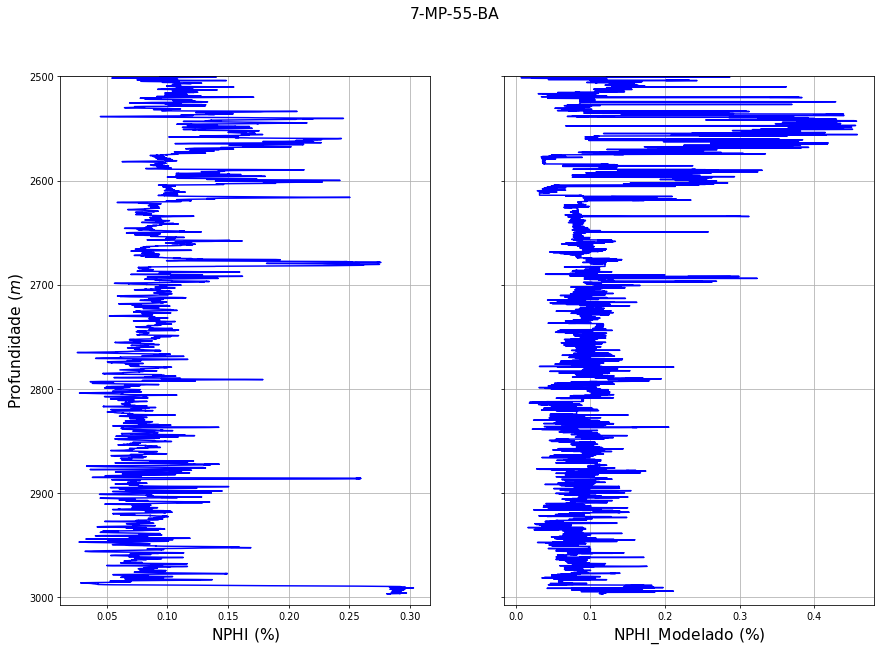

In [33]:
grafico = appynho.plotagem(2, titulo = '7-MP-55-BA', altura = 10, comprimento = 15 )
grafico.plot_s(0, separate_55['NPHI'], separate_55['DEPTH'], cor = 'b', descricao_x = 'NPHI $(\%)$', descricao_y = 'Profundidade $(m)$', titulo = '')
grafico.plot_s(1, nphi_sort_55, separate_55['DEPTH'], cor = 'b', descricao_x = 'NPHI_Modelado $(\%)$', descricao_y = 'Profundidade $(m)$', titulo = '')

In [18]:
import perfis

In [19]:
cores = {}
for lith in litho_types:
    cores[int(litho_types[lith]['CODE'])] = [litho_types[lith]['COLOR'],lith]

In [20]:
def nova_estrutura_de_Dados(dicionario_statistica, lista_dados, cores_informativo):
    
    statistic_data = {}
    for j in lista_dados:
        statistic_data[j] = {}
        dado = {}
        for i in cores_informativo:
            a = dicionario_statistica[ cores_informativo[i][1] ][j]
            l_prof = (np.array(a['Mean']['Top']) + np.array(a['Mean']['Base']))/2.0
            l_mean = a['Mean']['Value']
            l_std = a['Std']['Value']
            dado[i] = [l_prof, l_mean, l_std]
            statistic_data[j][i] = dado[i]
            
    return statistic_data

# -------------------------------------------------------- #

In [21]:
dados = ['GR','NPHI','RHOB', 'DT']

database_reestruturado = nova_estrutura_de_Dados(database, dados, cores)

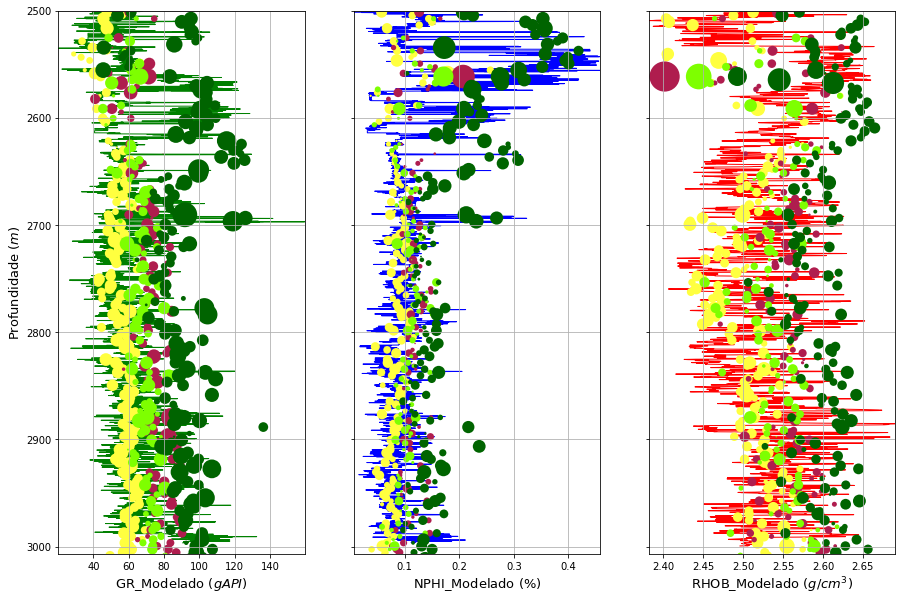

In [38]:
usuario_layout_stats_55D = {
    'comprimento':15,
    'altura':10,
    'linha_estilo' : '-',
    'titulo_fonte':16,
    'resolucao':72,
    'titulo_geral':'',
    'descricao_x':'',
    'descricao_y':'Profundidade $(m)$',
}

grafico = perfis.plotagem(3, usuario_layout_stats_55D)

grafico.plot_stats(0,database_reestruturado['GR'],49,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(0,database_reestruturado['GR'],54,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(0,database_reestruturado['GR'],25,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_stats(0,database_reestruturado['GR'],57,cores,{'gridagem':False,'ordem_z':1},escala=20)
grafico.plot_s(0, gr_sort_55, separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR_Modelado $(gAPI)$', 'titulo':'','ordem_z':-1})

grafico.plot_stats(1,database_reestruturado['NPHI'],49,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(1,database_reestruturado['NPHI'],54,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(1,database_reestruturado['NPHI'],25,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(1,database_reestruturado['NPHI'],57,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_s(1, nphi_sort_55, separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI_Modelado $(-)$', 'titulo':'','ordem_z':-1})

grafico.plot_stats(2,database_reestruturado['RHOB'],49,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['RHOB'],54,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['RHOB'],25,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_stats(2,database_reestruturado['RHOB'],57,cores,{'gridagem':False,'ordem_z':1},escala=5000)
grafico.plot_s(2, separate_55['RHOB'], separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB_Modelado $(g/cm^3)$', 'titulo':''})

#grafico.plot_l(3, separate_55['LITHOLOGY'], separate_55['DEPTH'], cores, {'titulo':'7-MP-55D-BA','curva_limite':separate_55['LITHOLOGY'],'linha_espessura':0.1})

In [ ]:
#Confirmar unidade do nphi